In [4]:
from tasks.linkage import Linkage

In [5]:
l = Linkage(8,1)
l.seed(2)
l.reset()

In [6]:
l.step('11111111')


('11111111',
 4.188220640958649,
 True,
 {'linkage_utilization': [0.41051140196545605,
   0.5005596902507438,
   0.47632572787446964,
   0.5325847898812922,
   0.474562351243153,
   0.5761408312728729,
   0.3863600176905661,
   0.8311758307800956]})

In [6]:
import gomea
import numpy as np
# Custom fitness function resembling the concatenated deceptive trap function of size k
class CustomTrapFunction(gomea.fitness.BBOFitnessFunctionDiscrete):
    # Any members must be assigned in __new__ to make them accessible during instantiation of superclass
    def __new__(self, number_of_variables, k,l):
        self.k = k
        self.l = l
        return super().__new__(self,number_of_variables)
        
    def objective_function(self, objective_index, variables):
        f = 0
        s = ''
        for i in range(0,self.number_of_variables):
            s += str(variables[i])
        out = self.l.step(s)
        f = out[1]
        #print(f)
        return f

dim = 8
l = Linkage(dim,0.2)
l.seed(2)
l.reset()
lm = gomea.linkage.LinkageTree()
fd = CustomTrapFunction(dim,k=1,l=l)
dgom = gomea.DiscreteGOMEA(fitness=fd,linkage_model=lm,max_number_of_evaluations=10000)
result = dgom.run()
result.printAllStatistics()
result.printFinalStatistics()

ERROR! Session/line number was not unique in database. History logging moved to new session 82


In [19]:
import numpy as np

def fitness(bitstring):
    """ Calculate the fitness of a bitstring. Fitness is the sum of XOR of pairs of bits. """
    return np.sum([bitstring[i] ^ bitstring[i+1] for i in range(0, len(bitstring), 2)])

def special_crossover(parent1, parent2):
    """ Perform special crossover where pairs of bits are treated as a unit. """
    offspring = np.empty_like(parent1)
    for i in range(0, len(parent1), 2):
        if np.random.rand() < 0.5:
            offspring[i:i+2] = parent1[i:i+2]
        else:
            offspring[i:i+2] = parent2[i:i+2]
    return offspring

def uniform_crossover(parent1, parent2):
    """ Perform uniform crossover. """
    offspring = np.array([parent1[i] if np.random.rand() < 0.5 else parent2[i] for i in range(len(parent1))])
    return offspring

def mutate(bitstring, mutation_rate=1):
    """ Mutate a bitstring with a given mutation rate. """
    for i in range(len(bitstring)):
        if np.random.rand() < mutation_rate / len(bitstring):
            bitstring[i] = 1 - bitstring[i]
    return bitstring

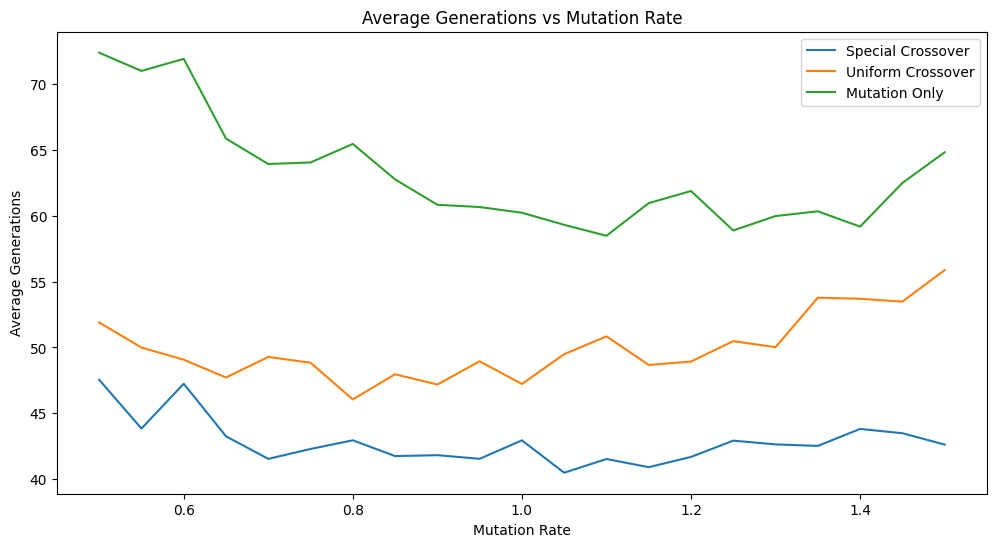

In [24]:
import matplotlib.pyplot as plt

def genetic_algorithm_with_mutation_rate(n, crossover_function, mutation_rate, num_runs=500):
    """ Run a (5+1) genetic algorithm with the given crossover function and mutation rate. """
    total_generations = 0
    for _ in range(num_runs):
        population = [np.random.randint(0, 2, 2*n) for _ in range(5)]
        generations = 0
        while True:
            generations += 1
            parents_indices = np.random.choice(len(population), 2, replace=False)
            parents = [population[parents_indices[0]], population[parents_indices[1]]]

            # Apply crossover if a crossover function is provided, else skip to mutation
            if crossover_function:
                offspring = crossover_function(parents[0], parents[1])
            else:
                offspring = np.copy(parents[0])  # choose a random parent as offspring for mutation only
            
            offspring = mutate(offspring, mutation_rate=mutation_rate)
            offspring_fitness = fitness(offspring)
            min_fitness_individual_index = np.argmin([fitness(individual) for individual in population])
            if offspring_fitness > fitness(population[min_fitness_individual_index]):
                population[min_fitness_individual_index] = offspring
            if max(map(fitness, population)) == n:
                break
        total_generations += generations
    return total_generations / num_runs

# Mutation rates
bitstring_length = 2 * n  # Size of the bitstring
mutation_rates = np.linspace(0.5, 1.5, 21)

# Run simulations and collect data
avg_generations_special = [genetic_algorithm_with_mutation_rate(n, special_crossover, mr) for mr in mutation_rates]
avg_generations_uniform = [genetic_algorithm_with_mutation_rate(n, uniform_crossover, mr) for mr in mutation_rates]
avg_generations_mutation_only = [genetic_algorithm_with_mutation_rate(n, None, mr) for mr in mutation_rates]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(mutation_rates, avg_generations_special, label='Special Crossover')
plt.plot(mutation_rates, avg_generations_uniform, label='Uniform Crossover')
plt.plot(mutation_rates, avg_generations_mutation_only, label='Mutation Only')
plt.xlabel('Mutation Rate')
plt.ylabel('Average Generations')
plt.title('Average Generations vs Mutation Rate')
plt.legend()
plt.show()